In [1]:
import pandas as pd
birdata = pd.read_csv('bird_tracking.csv')
birdata.columns

Index(['altitude', 'date_time', 'device_info_serial', 'direction', 'latitude',
       'longitude', 'speed_2d', 'bird_name'],
      dtype='object')

In [2]:
ix = birdata.bird_name == "Sanne"
data = birdata.date_time[ix]
print(data[:1])

40923    2013-08-15 00:01:08+00
Name: date_time, dtype: object


In [4]:
data = birdata.date_time[ix]
print(data[-1:])

61930    2014-04-30 23:59:34+00
Name: date_time, dtype: object


In [5]:
import pandas as pd
birdata = pd.read_csv('bird_tracking.csv')
import datetime as dt
timestamps = []
for k in range(len(birdata)):
    timestamps.append(dt.datetime.strptime
                     (birdata.date_time.iloc[k][:-3], '%Y-%m-%d %H:%M:%S'))
birdata['timestamp'] = pd.Series(timestamps, index = birdata.index)
times = birdata.timestamp[birdata.bird_name == 'Eric']
elapsed = [time - times[0] for time in times]
elapsed[100]

Timedelta('1 days 05:24:41')

In [13]:
elapsed[100] / dt.timedelta(hours=1)

29.41138888888889

In [15]:
import pandas as pd
birdata = pd.read_csv('bird_tracking.csv')
ix = birdata.bird_name == "Eric"
speed = birdata.speed_2d[ix]
print(speed.head())

0    0.191484
1    2.739698
2    0.360099
3    0.039658
4    0.107988
Name: speed_2d, dtype: float64


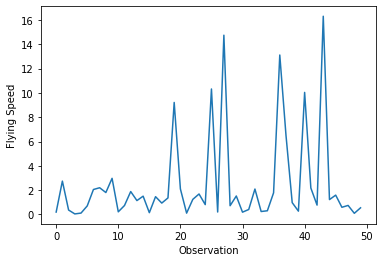

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(range(50), speed[:50]);
plt.xlabel('Observation')
plt.ylabel('Flying Speed');

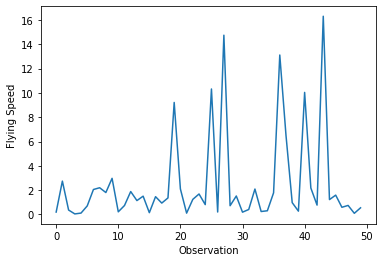

In [18]:
import matplotlib.pyplot as plt
speed = birdata.speed_2d[birdata.bird_name == 'Eric']
plt.plot(range(50), speed[:50]);
plt.xlabel('Observation')
plt.ylabel('Flying Speed');

In [19]:
import pandas as pd
birdata = pd.read_csv('bird_tracking.csv')
speed = birdata.speed_2d[birdata.bird_name == 'Eric']
import numpy as np
speed = np.array(speed)
np.isnan(speed)
nanlist = []
def getnan(s):
    for i, n in enumerate(s):
        if np.isnan(n):
            nanlist.append(i)
getnan(speed)
print('nan의 총개수:', len(nanlist))
print(nanlist)

nan의 총개수: 85
[219, 1006, 1232, 1255, 1531, 1731, 2470, 3219, 3406, 3413, 3430, 3436, 3597, 3617, 3638, 3738, 3743, 4049, 4068, 4120, 4149, 4357, 4514, 4594, 4689, 4779, 4929, 4984, 5010, 5027, 5117, 5158, 5736, 5745, 5904, 6003, 6572, 6665, 6934, 6974, 7430, 7597, 8180, 8933, 9202, 9325, 9357, 9426, 9593, 10107, 10143, 10153, 10163, 10553, 10942, 10944, 11321, 12618, 12762, 13096, 13182, 13284, 14110, 14476, 14997, 15031, 15104, 15579, 15774, 15811, 15910, 16785, 16977, 17947, 18235, 18316, 19196, 19519, 19528, 19548, 19623, 19624, 19756, 19774, 19781]


Eric 19.586199378586844
Nico 32.60667661083755
Sanne 0.0044727258858547145


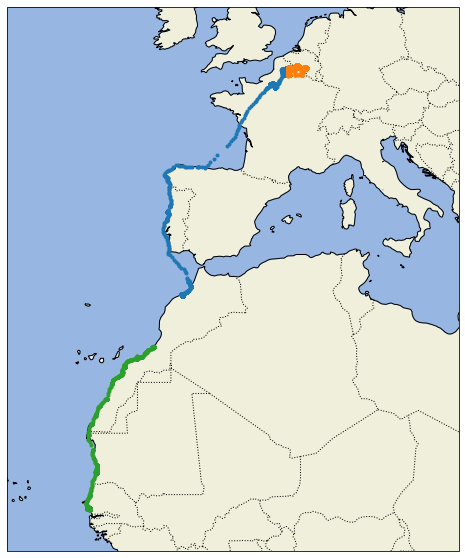

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
import cartopy.crs as ccrs
import cartopy.feature as cfeature
proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0,20.0,52.0,10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

def euc(a,b) :
    return distance.euclidean(a,b)
birdata = pd.read_csv('bird_tracking.csv')
bird_names = pd.unique(birdata.bird_name)
sindex = 2500
eindex = 7500
ix = birdata['bird_name'] == 'Eric'
x, y = birdata.longitude[ix], birdata.latitude[ix]
i = [x[sindex],y[sindex]]
j = [x[eindex],y[eindex]]
ax.plot(x[sindex:eindex], y[sindex:eindex], '.', transform=ccrs.Geodetic());
print('Eric', euc(i,j))
ix = birdata['bird_name'] == 'Nico'
x, y = birdata.longitude[ix], birdata.latitude[ix]
start = len(x)
dest = len(y)
i = [x[start+sindex],y[start+sindex]]
j = [x[dest+eindex],y[dest+eindex]]
ax.plot(x[sindex:eindex], y[sindex:eindex], '.', transform=ccrs.Geodetic());
print('Nico', euc(i,j))
ix = birdata['bird_name'] == 'Sanne'
x, y = birdata.longitude[ix], birdata.latitude[ix]
#print(x.get_value[40920])
start = start + len(x)
dest = dest + len(y)
i = [x[start+sindex],y[start+sindex]]
j = [x[dest+eindex],y[dest+eindex]]
ax.plot(x[sindex:eindex], y[sindex:eindex], '.', transform=ccrs.Geodetic());
print('Sanne', euc(i,j))

In [2]:
longest = 0
distlist = []
def euc(a, b) :
    return distance.euclidean(a, b)
ix = birdata['bird_name'] == 'Eric'
x, y = birdata.longitude[ix], birdata.latitude[ix]
i = [x[0],y[0]]
for ind in range(len(x)-1):
    j = [x[ind+1],y[ind+1]]
    newlength = euc(i,j)
    distlist.append(newlength)
    if(euc(i,j) > longest):
        longest = newlength
print('Longest=', longest)

Longest= 22.599112725372304


In [3]:
bird_names = pd.unique(birdata.bird_name)
bird_dist = {}
def euc(a,b) :
    return distance.euclidean(a,b)
start = 0
end = 0
count = 0
for bird_name in bird_names:
    ix = birdata['bird_name'] == bird_name
    x, y = birdata.longitude[ix], birdata.latitude[ix]
    longest = 0
    i = [x[start],y[start]]
    for ind in range(len(x)-1):
        j = [x[start+ind+1], y[start+ind+1]]
        newlength = euc(i, j)
        distlist.append(newlength)
        if ( euc(i ,j) > longest):
            longest = newlength
    bird_dist[bird_names[count]] = longest
    count = count + 1
    start = start + len(x)
    dest = dest + len(x)
obj = pd.Series(bird_dist)
obj

Eric     22.599113
Nico     43.449202
Sanne    40.871441
dtype: float64

In [6]:
bird_names = pd.unique(birdata.bird_name)
bird_dist = {}
def euc(a,b) :
    return distance.euclidean(a,b)
start = 0
end = 0
count = 0

for bird_name in bird_names:
    ix = birdata['bird_name'] == bird_name
    x, y = birdata.longitude[ix], birdata.latitude[ix]
    longest = 0
    i = [x[start],y[start]]
    for ind in range(len(x)-1):
        j = [x[start+ind+1], y[start+ind+1]]
        newlength = euc(i, j)
        distlist.append(newlength)
        if ( euc(i ,j) > longest):
            longest = newlength
    bird_dist[bird_names[count]] = longest
    count = count + 1
    start = start + len(x)
    dest = dest + len(x)
bird_distkm = pd.Series(bird_dist)*40000/360
dict(bird_distkm)

{'Eric': 2511.012525041367,
 'Nico': 4827.689090091931,
 'Sanne': 4541.271186064482}

In [20]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.
